In [30]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
FEATURE_DIMS = ["Color", "Shape", "Pattern"]
OUTPUT_DIR = "/data/patrick_scratch/information"

SESSIONS_PATH = "/data/patrick_scratch/multi_sess/valid_sessions_rpe.pickle"

EVENT = "FeedbackOnset"

session = 20180802
mi = pd.read_pickle(os.path.join(OUTPUT_DIR, f"{session}_rule_{EVENT}_mi.pickle"))
null = pd.read_pickle(os.path.join(OUTPUT_DIR, f"{session}_rule_{EVENT}_null_stats.pickle"))
shuffled_mis = pd.read_pickle(os.path.join(OUTPUT_DIR, f"{session}_rule_{EVENT}_null_shuffled.pickle"))


In [32]:
sessions = pd.read_pickle(SESSIONS_PATH)

In [33]:
sessions.sort_values("session_name")

,session_datetime,session_count,session_name,valid,FE_abs_median,FD_abs_median,FRL_abs_median,FE_quantile_25,FD_quantile_25,FRL_quantile_25,FE_quantile_75,FD_quantile_75,FRL_quantile_75,FE_neg_median,FE_pos_median
64,2018-07-05,0.0,20180705,True,0.257358,0.241773,0.298967,-0.187028,-0.170110,-0.146613,0.359338,0.345859,0.364543,-0.208793,0.322929
5,2018-07-09,0.0,20180709,True,0.226614,0.205048,0.241765,-0.169262,-0.133532,-0.139759,0.275825,0.254455,0.293225,-0.250000,0.207856
104,2018-07-12,0.0,20180712,True,0.242642,0.235202,0.250000,-0.168727,-0.137569,-0.128439,0.307590,0.302136,0.300696,-0.212700,0.260526
30,2018-07-25,1.0,201807250001,True,0.260517,0.243805,0.255710,-0.164153,-0.134953,-0.142667,0.317750,0.293995,0.319140,-0.217215,0.287453
20,2018-08-01,0.0,20180801,True,0.242147,0.238351,0.285666,-0.212973,-0.204242,-0.155909,0.290924,0.283132,0.337447,-0.239628,0.243346
42,2018-08-02,0.0,20180802,True,0.241787,0.237204,0.284283,-0.211894,-0.194293,-0.173315,0.284368,0.289790,0.349909,-0.241726,0.241865
98,2018-08-03,0.0,20180803,True,0.248641,0.240376,0.284589,-0.200329,-0.170476,-0.132136,0.313272,0.303495,0.345469,-0.235302,0.270004
13,2018-08-06,0.0,20180806,True,0.242386,0.239528,0.275971,-0.205088,-0.190118,-0.143129,0.322685,0.326813,0.333964,-0.224917,0.277086
44,2018-08-08,0.0,20180808,True,0.251108,0.240145,0.280247,-0.195031,-0.186396,-0.143329,0.297459,0.289931,0.347097,-0.240865,0.264807
115,2018-09-10,0.0,20180910,True,0.241548,0.224617,0.271103,-0.210888,-0.193156,-0.161423,0.278899,0.263049,0.322972,-0.238867,0.245255


In [34]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
NUM_BINS_SMOOTH = 1
EVENT = "FeedbackOnset"
fr_path = f"/data/patrick_scratch/multi_sess/{session}/{session}_firing_rates_{PRE_INTERVAL}_{EVENT}_{POST_INTERVAL}_{INTERVAL_SIZE}_bins_{NUM_BINS_SMOOTH}_smooth.pickle"
frs = pd.read_pickle(fr_path)
pos = spike_utils.get_unit_positions_per_sess(session)
pos = spike_utils.get_manual_structure(pos)

In [35]:
bon_feature_stats = information_utils.calc_corrected_null_stats(shuffled_mis, ["CurrentRule"], p_val=0.05, num_hyp=5)
null = pd.merge(null, bon_feature_stats, on=["UnitID", "TimeBins"])

In [36]:
mi_df = pd.merge(mi, null, on=["UnitID", "TimeBins"])
unit_sig = information_utils.assess_significance(mi_df, ["CurrentRule"])

In [37]:
sig_units = unit_sig[unit_sig.CurrentRuleSig].UnitID.unique()

/tmp/ipykernel_264532/3807603531.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots()


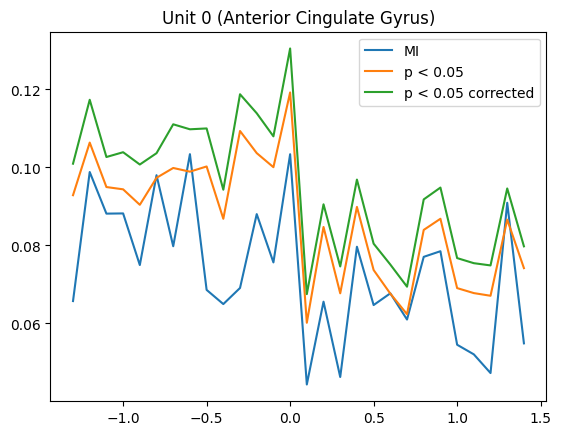

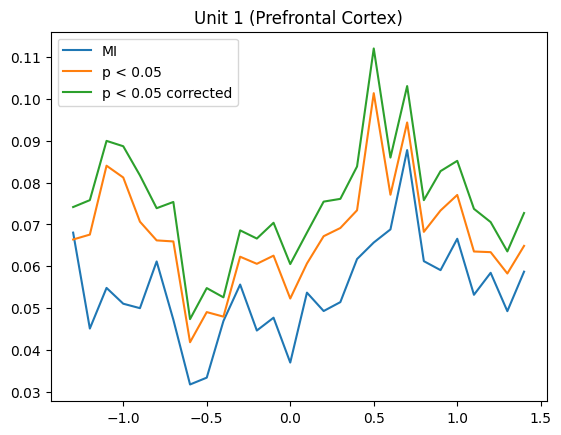

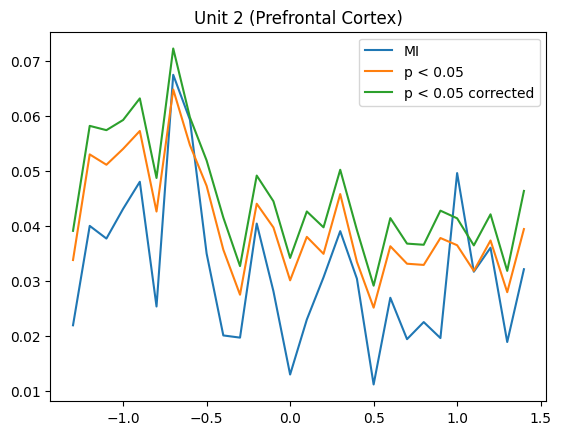

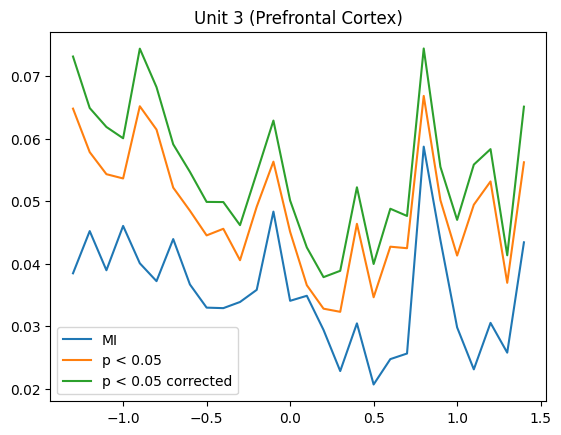

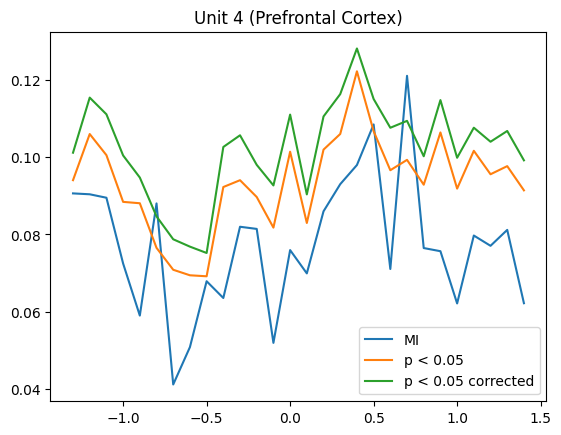

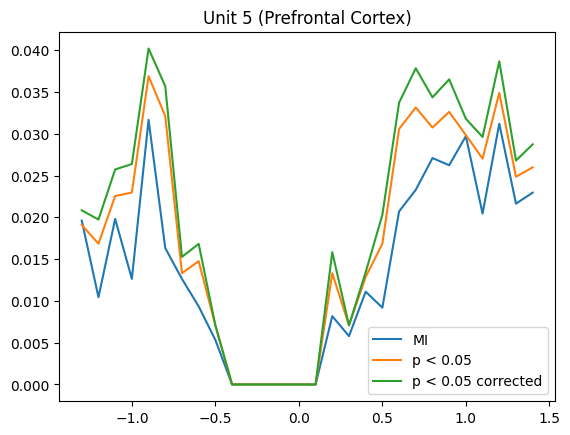

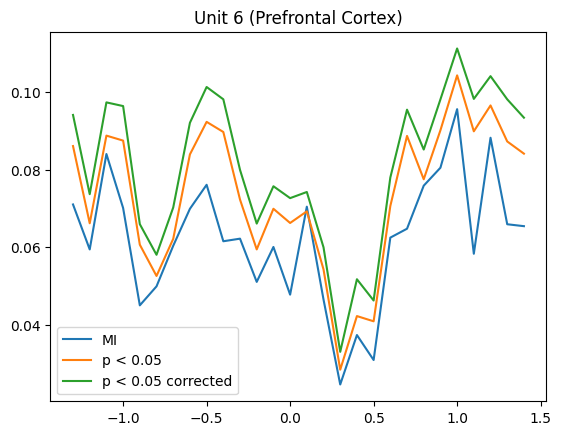

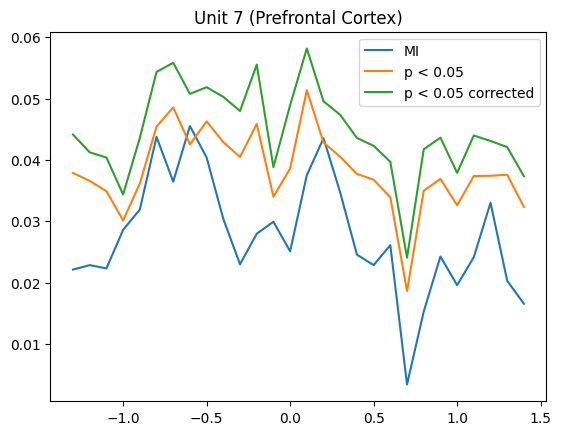

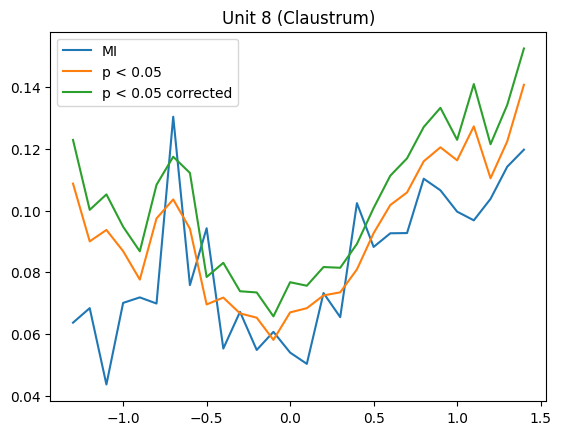

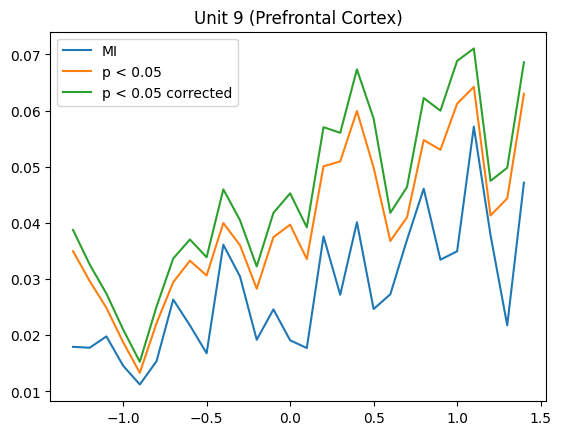

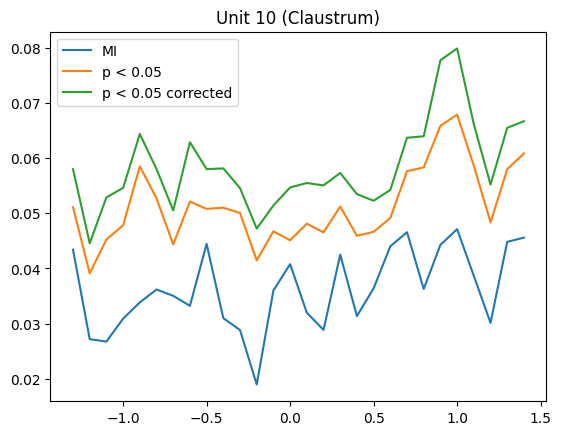

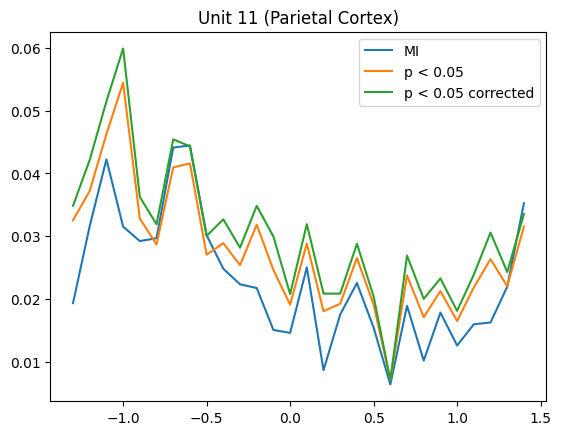

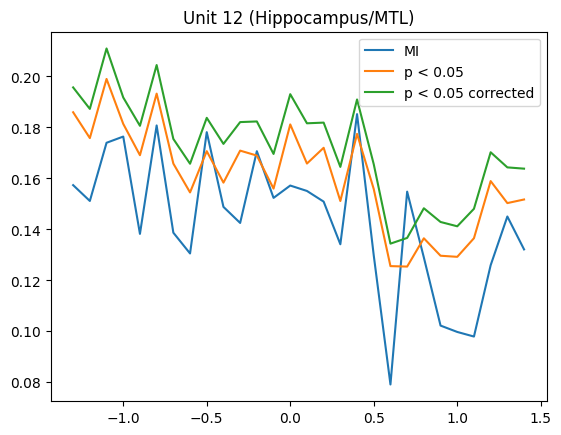

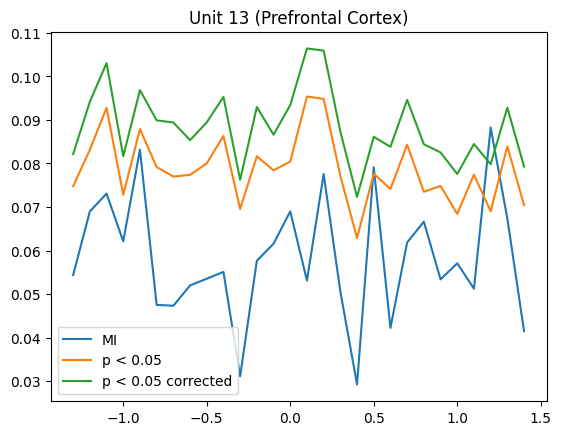

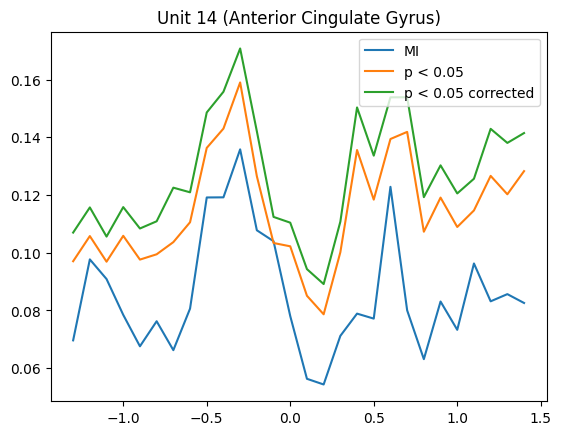

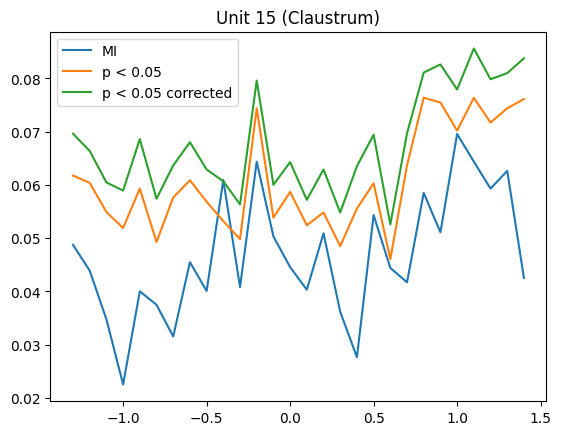

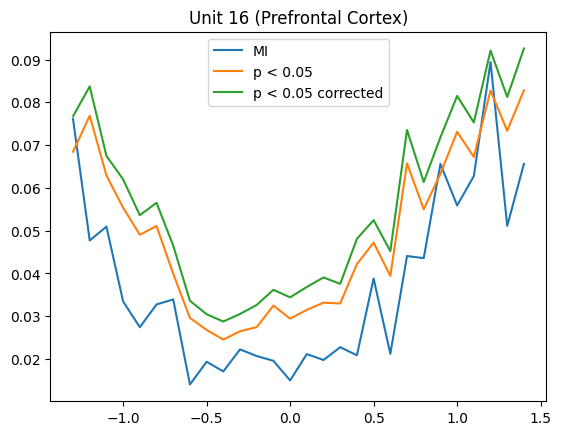

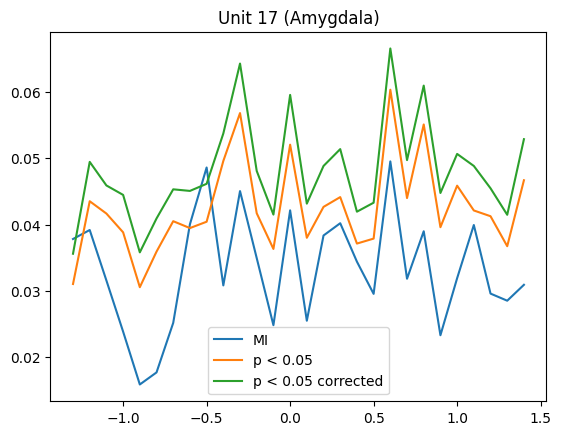

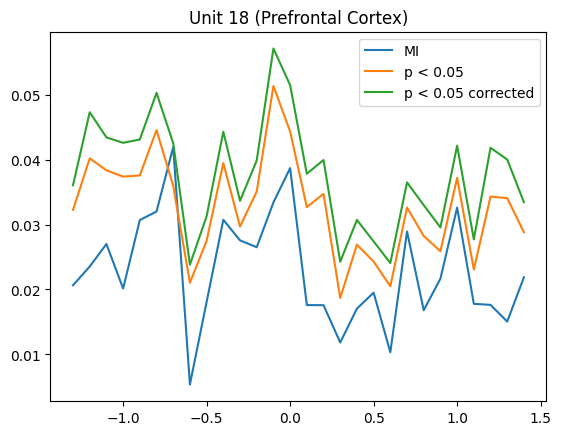

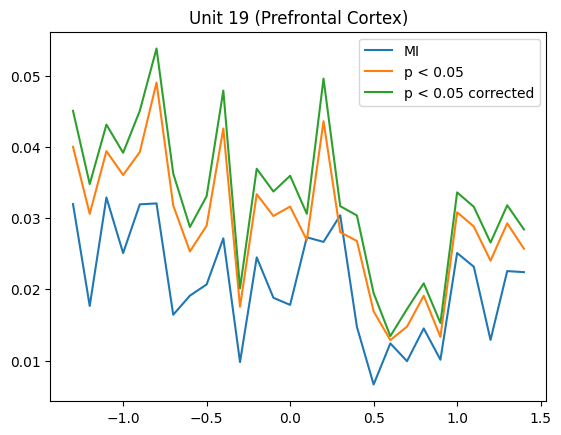

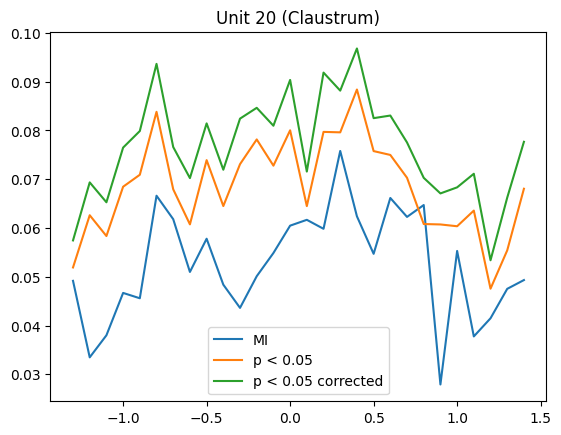

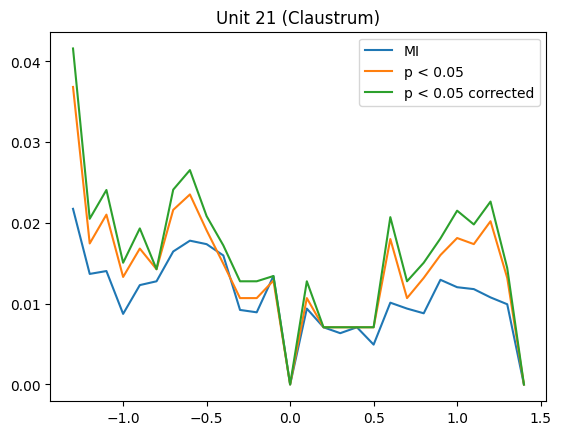

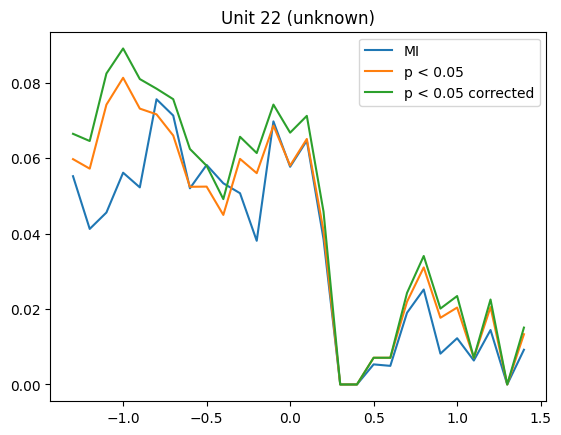

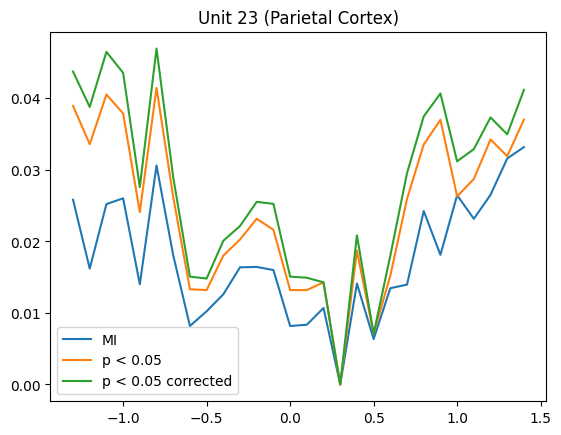

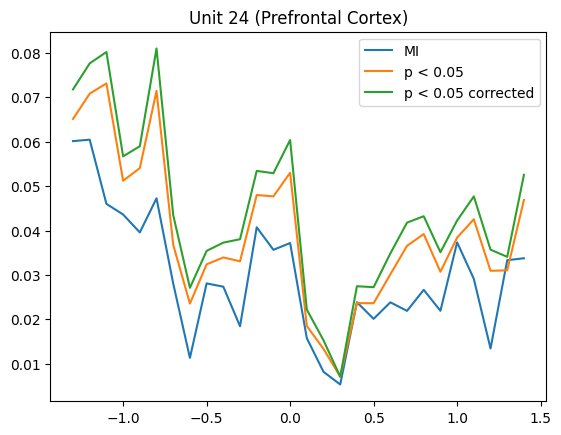

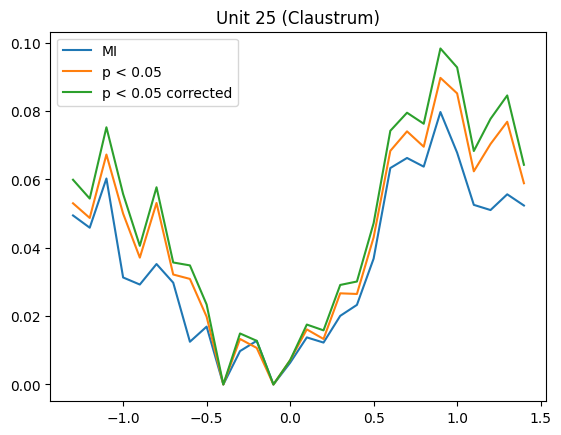

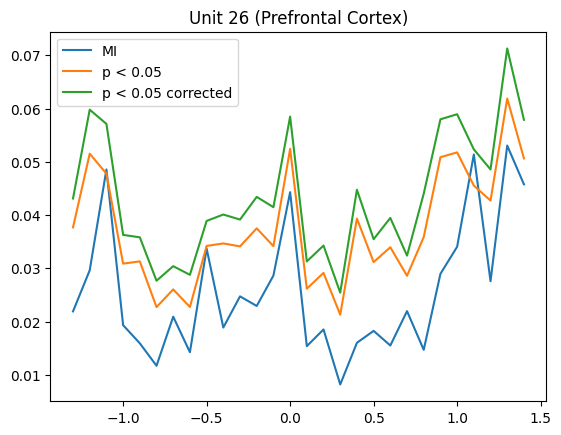

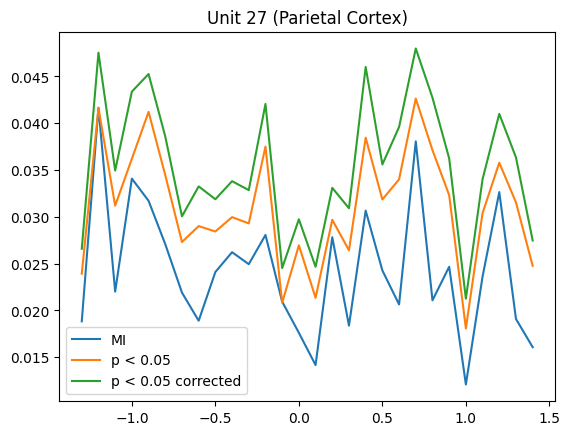

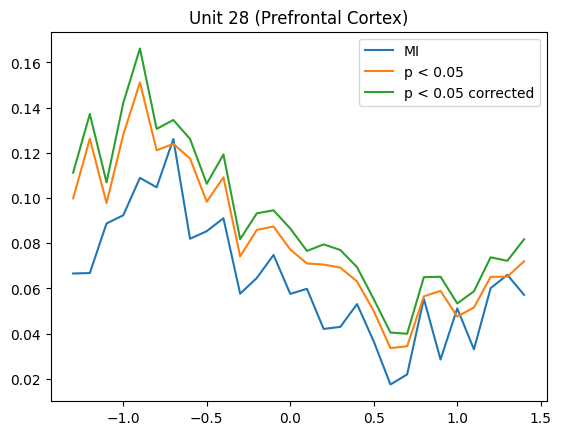

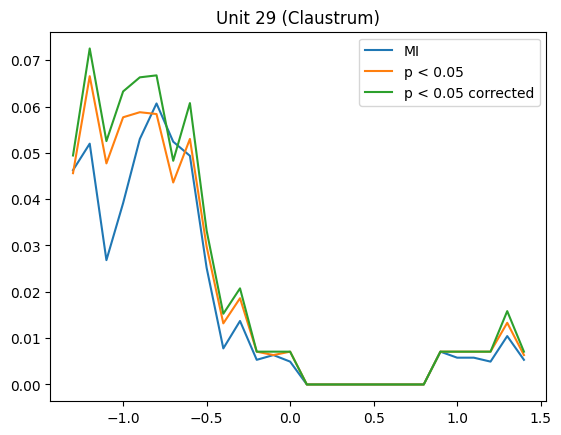

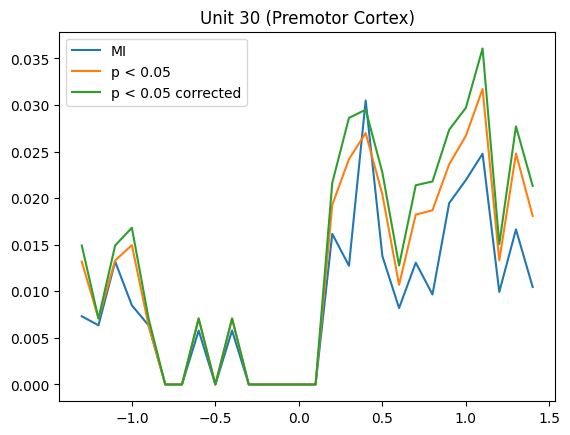

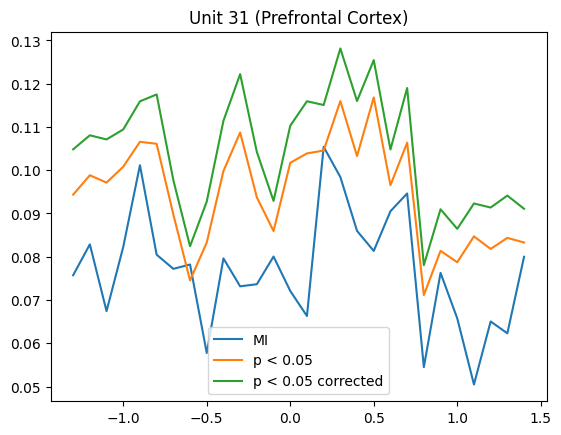

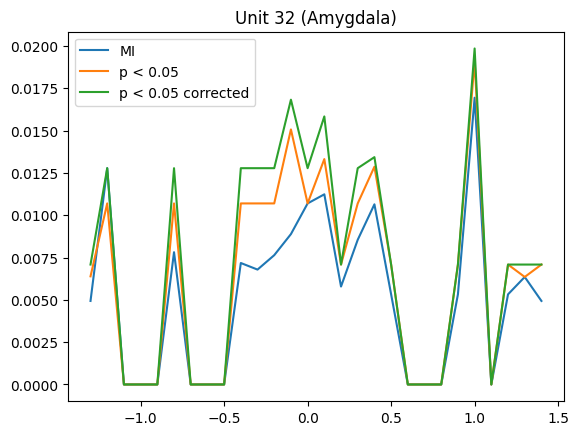

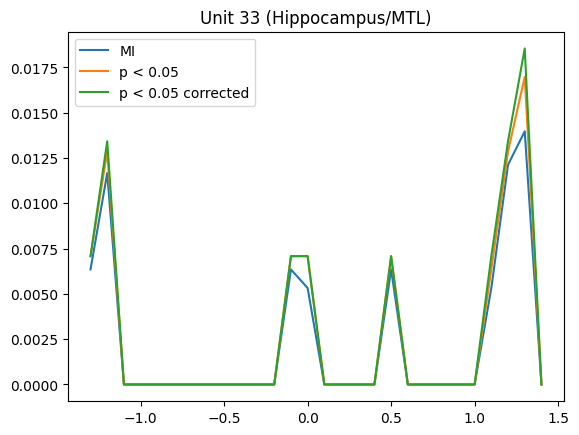

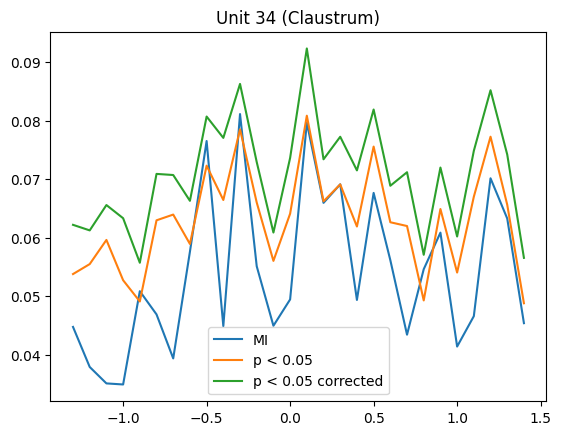

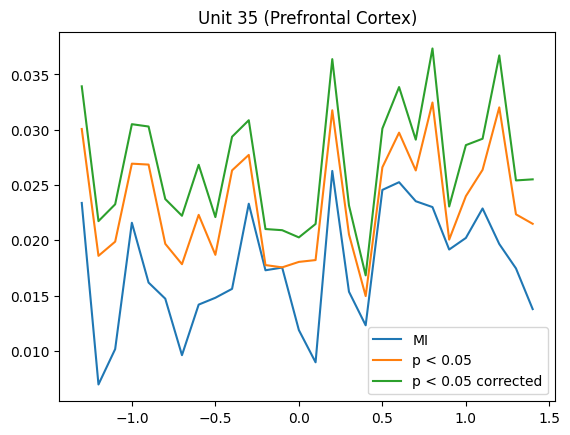

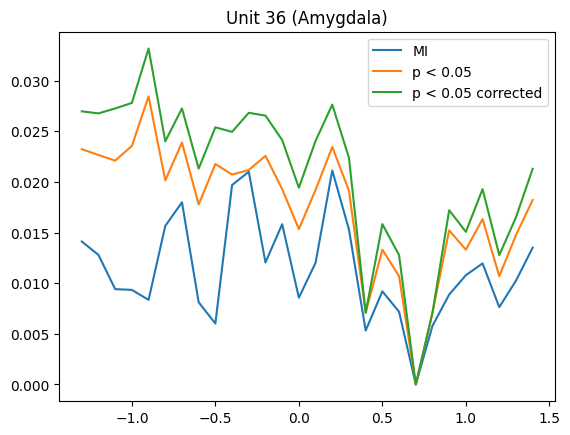

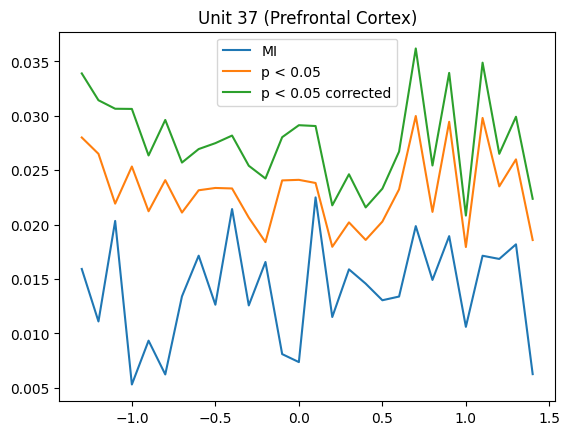

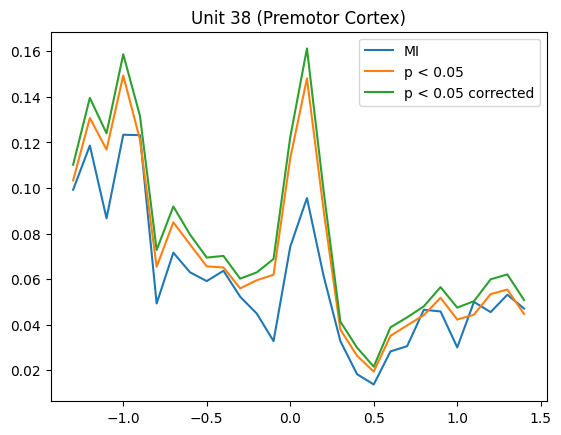

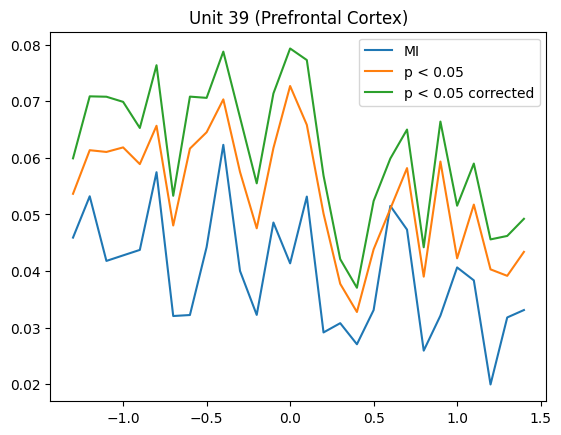

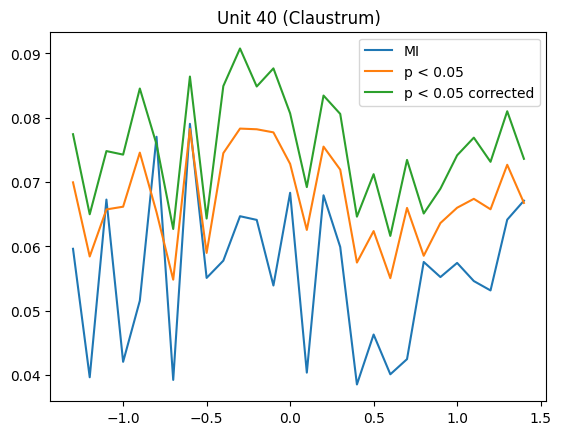

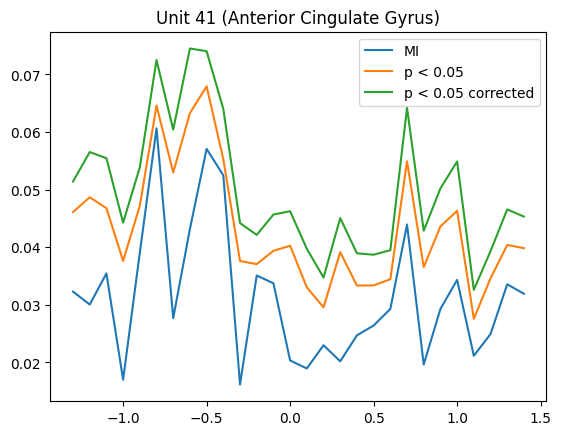

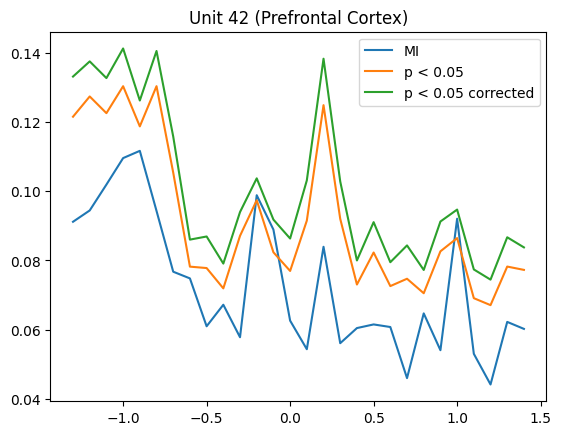

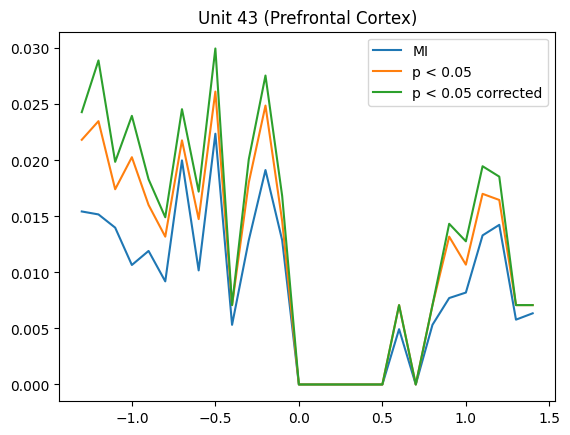

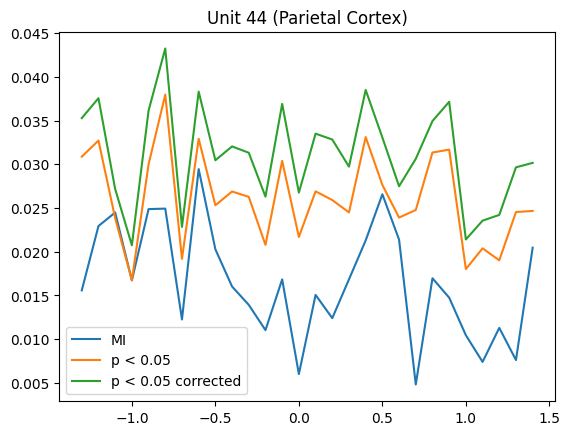

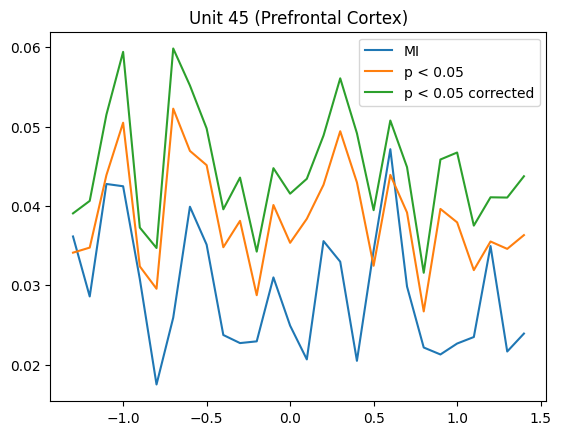

In [38]:
for unit in mi.UnitID.unique():
    fig, axs = plt.subplots()
    unit_pos = pos[pos.UnitID == unit].manual_structure.unique()[0]
    unit_mi = mi[mi.UnitID == unit]
    unit_null = null[null.UnitID == unit]
    time_bins = unit_mi.TimeBins - 1.3
    mi_vals = unit_mi[f"MICurrentRule"]
    null_95 = unit_null[f"MIShuffledCurrentRule95th"]
    # null_99 = unit_null[f"MIShuffled{feature}99th"]
    null_95_cor = unit_null[f"MIShuffledCurrentRuleCorrected"]
    mean_shuffled = unit_null[f"MIShuffledCurrentRuleMean"]

    axs.plot(time_bins, mi_vals, label="MI")
    axs.plot(time_bins, null_95, label="p < 0.05")
    # axs[i].plot(time_bins, null_99, label="p < 0.01")
    axs.plot(time_bins, null_95_cor, label="p < 0.05 corrected")
    # axs.plot(time_bins, mean_shuffled, label="mean shuffled")

    axs.set_title(f"Unit {unit} ({unit_pos})")
    axs.legend()